In [1]:
import pandas as pd
df= pd.read_csv(r"D:\IITJammu assignments\fake_job_postings.csv")
print(df.head())

   job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Foo

In [3]:
df.isnull().values.any()

True

In [5]:
missing_rows = df[df.isnull().any(axis=1)]
print(missing_rows)

       job_id                                              title  \
0           1                                   Marketing Intern   
1           2          Customer Service - Cloud Video Production   
2           3            Commissioning Machinery Assistant (CMA)   
3           4                  Account Executive - Washington DC   
4           5                                Bill Review Manager   
...       ...                                                ...   
17875   17876                   Account Director - Distribution    
17876   17877                                 Payroll Accountant   
17877   17878  Project Cost Control Staff Engineer - Cost Con...   
17878   17879                                   Graphic Designer   
17879   17880                         Web Application Developers   

                   location   department salary_range  \
0          US, NY, New York    Marketing          NaN   
1            NZ, , Auckland      Success          NaN   
2           

In [7]:
missing_info = missing_rows.isnull()
print(missing_info)

       job_id  title  location  department  salary_range  company_profile  \
0       False  False     False       False          True            False   
1       False  False     False       False          True            False   
2       False  False     False        True          True            False   
3       False  False     False       False          True            False   
4       False  False     False        True          True            False   
...       ...    ...       ...         ...           ...              ...   
17875   False  False     False       False          True            False   
17876   False  False     False       False          True            False   
17877   False  False     False        True          True            False   
17878   False  False     False        True          True             True   
17879   False  False     False       False          True            False   

       description  requirements  benefits  telecommuting  has_company_logo

In [11]:
df_orig= df.copy()

In [25]:
print(df.shape)                      
print("******")
print(df.isnull().sum())             # count missing per column
print("-------******------")
missing_percent= print((df.isnull().mean()*100).round(2))  # percentage% missing per column

(17880, 18)
******
job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64
-------******------
job_id                  0.00
title                   0.00
location                1.94
department             64.58
salary_range           83.96
company_profile        18.50
description             0.01
requirements           15.08
benefits               40.34
telecommuting           0.00
has_company_logo        0.00
has_questions           0.00
employment_type        19.41
required_experience    39.43
required_education  

In [39]:
miss_percent = df.isnull().mean()*100
columns_to_drop = miss_percent[miss_percent > 50].index.tolist()
print(columns_to_drop)

['department', 'salary_range']


In [45]:
#cols_to_drop = missing_percent[missing_percent > 30].index
print(df.drop(columns=columns_to_drop, inplace=True)
#df.drop(columns_to_drop)

KeyError: "['department', 'salary_range'] not found in axis"

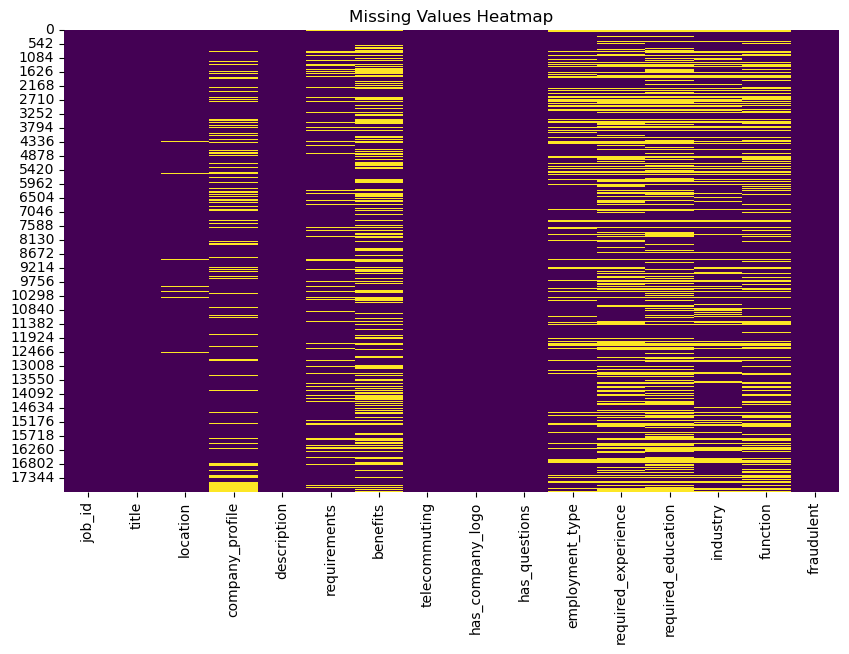

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

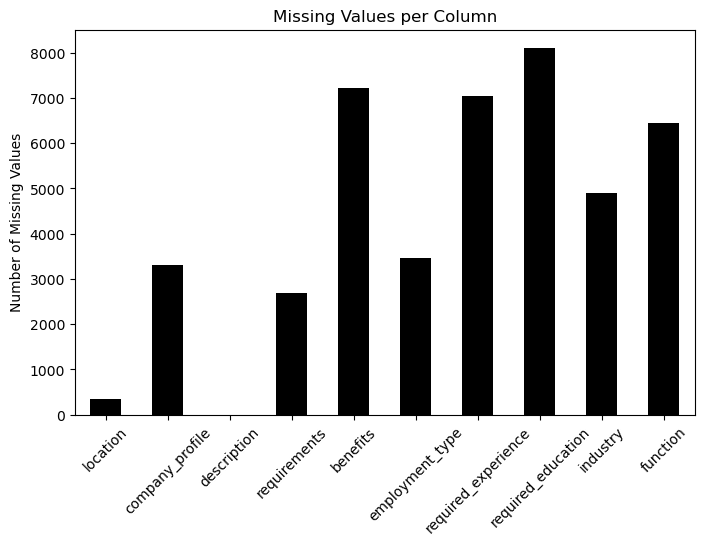

In [51]:
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]  # only columns with NaNs

plt.figure(figsize=(8, 5))
missing_counts.plot(kind='bar', color='black')
plt.ylabel("Number of Missing Values")
plt.title("Missing Values per Column")
plt.xticks(rotation=45)
plt.show()
